# Problem Statement

For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not. Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the risk using the given features.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.shape, test.shape

((543, 8), (233, 7))

In [4]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [5]:
combine = train.append(test)
combine.shape

C:\Users\hungu\anaconda.x\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(776, 8)

In [6]:
combine['City'].value_counts()

40    76
9     68
41    53
6     52
2     47
37    44
10    41
31    37
3     35
5     35
38    33
23    29
1     26
13    24
19    21
4     20
8     16
22    12
0     11
28    10
30     9
12     8
18     8
17     8
35     7
16     6
11     5
27     4
39     4
21     4
29     4
20     3
32     3
26     2
33     1
36     1
42     1
34     1
25     1
7      1
24     1
14     1
15     1
43     1
44     1
Name: City, dtype: int64

In [7]:
combine['Location_Score'].describe()

count    776.000000
mean      32.358938
std       24.961530
min        5.185000
25%       13.044250
50%       19.844000
75%       62.680750
max       80.809000
Name: Location_Score, dtype: float64

In [8]:
combine['External_Audit_Score'].value_counts()

5     104
3      99
8      94
7      87
6      85
4      85
10     47
11     39
15     32
12     32
14     30
13     30
9      12
Name: External_Audit_Score, dtype: int64

In [9]:
combine['Internal_Audit_Score'].value_counts()

8     111
7     104
6      89
11     71
10     71
5      62
3      62
4      57
12     46
13     40
15     33
14     15
9      15
Name: Internal_Audit_Score, dtype: int64

In [10]:
combine['Fin_Score'].value_counts()

4     110
8     105
7     100
5      98
6      91
3      91
11     38
10     38
14     28
12     27
13     23
15     17
9      10
Name: Fin_Score, dtype: int64

In [11]:
combine['Loss_score'].value_counts()

6     144
8     137
3     130
4     129
5     116
7     110
11      3
10      3
9       3
13      1
Name: Loss_score, dtype: int64

In [12]:
combine['Past_Results'].value_counts()

1     382
0     364
2      19
3       6
5       2
10      1
6       1
4       1
Name: Past_Results, dtype: int64

In [13]:
combine.columns

Index(['City', 'External_Audit_Score', 'Fin_Score', 'Internal_Audit_Score',
       'IsUnderRisk', 'Location_Score', 'Loss_score', 'Past_Results'],
      dtype='object')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['External_Audit_Score', 'Fin_Score', 'Internal_Audit_Score',
        'Location_Score', 'Loss_score', 'Past_Results']

combine[cols] = scaler.fit_transform(combine[cols])

C:\Users\hungu\anaconda.x\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
combine.head()

,City,External_Audit_Score,Fin_Score,Internal_Audit_Score,IsUnderRisk,Location_Score,Loss_score,Past_Results
0,2,0.416667,0.000000,0.916667,1.0,0.037647,0.3,0.0
1,31,0.000000,0.000000,0.416667,0.0,0.959285,0.5,0.1
2,40,0.750000,0.666667,0.000000,1.0,0.714297,0.0,0.0
3,12,0.166667,0.333333,0.083333,0.0,0.897797,0.3,0.0
4,4,1.000000,0.250000,0.833333,1.0,0.138594,0.4,0.2


In [16]:
X = combine[combine['IsUnderRisk'].isnull()!=True].drop(['IsUnderRisk'], axis=1)
y = combine[combine['IsUnderRisk'].isnull()!=True]['IsUnderRisk'].reset_index(drop=True)

X_test = combine[combine['IsUnderRisk'].isnull()==True].drop(['IsUnderRisk'], axis=1)

X.shape, y.shape, X_test.shape

((543, 7), (543,), (233, 7))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [18]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       num_leaves=30,
                       random_state=1994)

model.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val.values)],
          eval_metric='log_loss',
          early_stopping_rounds=100,
          verbose=200)

pred_y = model.predict_proba(x_val)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[77]	training's binary_logloss: 0.217411	valid_1's binary_logloss: 0.350859


In [19]:
from sklearn.metrics import log_loss
log_loss(y_val, pred_y)

0.3508587294296281

In [20]:
pred_test = model.predict_proba(X_test)

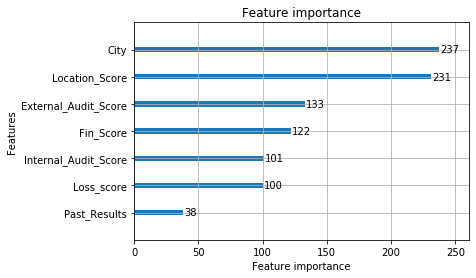

In [21]:
import lightgbm
import matplotlib.pyplot as plt
%matplotlib inline
lightgbm.plot_importance(model)

In [22]:
X.shape

(543, 7)

In [23]:
err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       num_leaves=30,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='log_loss',
          verbose=200)
    pred_y = m.predict_proba(x_val)
    print("err_lgm: ",log_loss(y_val,pred_y))
    err.append(log_loss(y_val, pred_y))
    pred_test = m.predict_proba(X_test)
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.150467	valid_1's binary_logloss: 0.315625
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.170293	valid_1's binary_logloss: 0.306952
err_lgm:  0.3069519658073337
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.151419	valid_1's binary_logloss: 0.18847
[400]	training's binary_logloss: 0.0873209	valid_1's binary_logloss: 0.192115
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.100171	valid_1's binary_logloss: 0.185219
err_lgm:  0.18521882994835806
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.143362	valid_1's binary_logloss: 0.339139
Early stopping, best iteration is:
[106]	training's binary_logloss: 0.199148	valid_1's binary_logloss: 0.32458
err_lgm:  0.3245795675119481
Training until validation scores don't improve for 200 rounds.
[200]	training's 

In [24]:
np.mean(err,0)

0.2830709719279002

In [25]:
from xgboost import XGBClassifier

errxgb = []
y_pred_tot_xgb = []

from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(boosting_type='gbdt',
                      max_depth=5,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='logloss',
          verbose=200)
    pred_y = m.predict_proba(x_val)
    print("err_xgb: ",log_loss(y_val,pred_y))
    errxgb.append(log_loss(y_val, pred_y))
    pred_test = m.predict_proba(X_test)
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

[0]	validation_0-logloss:0.652165	validation_1-logloss:0.652958
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 200 rounds.
[200]	validation_0-logloss:0.081922	validation_1-logloss:0.311106
Stopping. Best iteration:
[114]	validation_0-logloss:0.138294	validation_1-logloss:0.295306

err_xgb:  0.29530598950018555
[0]	validation_0-logloss:0.652464	validation_1-logloss:0.649286
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 200 rounds.
[200]	validation_0-logloss:0.076355	validation_1-logloss:0.216733
Stopping. Best iteration:
[93]	validation_0-logloss:0.158082	validation_1-logloss:0.203557

err_xgb:  0.20355679182260222
[0]	validation_0-logloss:0.651531	validation_1-logloss:0.658801
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Wi

In [26]:
np.mean(errxgb,0)

0.27878734123544224

In [27]:
from catboost import CatBoostClassifier,Pool, cv
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(n_estimators=1000,
                           random_state=1994,
                           eval_metric='Logloss',
                           learning_rate=0.5, 
                           max_depth=10)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict_proba(x_val)
    print("err_cb: ",log_loss(y_val,pred_y))
    errCB.append(log_loss(y_val,pred_y))
    pred_test = m.predict_proba(X_test)
    i = i + 1
    y_pred_tot_cb.append(pred_test)

0:	learn: 0.4368786	test: 0.4368786	test1: 0.4542807	best: 0.4542807 (0)	total: 666ms	remaining: 11m 4s
200:	learn: 0.0166842	test: 0.0166842	test1: 0.4768127	best: 0.3016665 (3)	total: 28s	remaining: 1m 51s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.3016665299
bestIteration = 3

Shrink model to first 4 iterations.
err_cb:  0.3016665299193479
0:	learn: 0.4308824	test: 0.4308824	test1: 0.4892891	best: 0.4892891 (0)	total: 228ms	remaining: 3m 47s
200:	learn: 0.0098090	test: 0.0098090	test1: 0.2351385	best: 0.1713204 (47)	total: 30.5s	remaining: 2m 1s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1713203772
bestIteration = 47

Shrink model to first 48 iterations.
err_cb:  0.17132037720366547
0:	learn: 0.4306822	test: 0.4306822	test1: 0.4814039	best: 0.4814039 (0)	total: 213ms	remaining: 3m 32s
200:	learn: 0.0222992	test: 0.0222992	test1: 0.5089425	best: 0.3189941 (43)	total: 26.4s	remaining: 1m 45s
Stopped by overfitting detector  (200 iter

In [28]:
np.mean(errCB, 0)

0.26101882494316203

In [29]:
(np.mean(errxgb, 0) + np.mean(err, 0) + np.mean(errCB, 0))/3

0.2742923793688348

In [30]:
submission = pd.DataFrame((np.mean(y_pred_tot_lgm, 0)+np.mean(y_pred_tot_xgb, 0)+np.mean(y_pred_tot_cb, 0))/3)
submission.to_excel('Submission.xlsx', index=False)

In [31]:
submission.shape

(233, 2)

In [32]:
submission.head()

,0,1
0,0.004210,0.995790
1,0.091560,0.908440
2,0.903180,0.096820
3,0.005282,0.994718
4,0.208438,0.791562
